In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
url = "https://api.db.nomics.world/v22/series/AMECO/UDGG.csv?dimensions=%7B%22freq%22%3A%5B%22a%22%5D%2C%22unit%22%3A%5B%22percentage-of-gdp-at-current-prices-excessive-deficit-procedure%22%5D%2C%22geo%22%3A%5B%22deu%22%2C%22ita%22%2C%22fra%22%2C%22esp%22%5D%7D&limit=1000"

df_debt = pd.read_csv(url)


In [41]:
df_debt

,period,Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
...,...,...,...,...,...
61,2021,68.9861,116.8408,112.9733,147.1270
62,2022,66.0769,111.6180,111.9182,140.5217
63,2023,63.6391,107.6521,110.6433,137.3104
64,2024,62.9344,105.5079,112.4088,138.6244


In [42]:
df_debt.to_csv('data/df_debt.csv', sep = ",", index = False)


In [43]:
new_names = {
    df_debt.columns[0]: "Year",
    df_debt.columns[1]: "Germany",
    df_debt.columns[2]: "Spain",
    df_debt.columns[3]: "France",
    df_debt.columns[4]: "italy",

}
df_debt = df_debt.rename(columns= new_names)
df_debt.head()

,Year,Germany,Spain,France,italy
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785


In [44]:
df_debt.isnull().sum()

Year        0
Germany    35
Spain      35
France     35
italy       0
dtype: int64

In [45]:
df_debt = df_debt.dropna()

df_debt.head()

,Year,Germany,Spain,France,italy
35,1995,54.9024,61.5424,57.5929,119.3622
36,1996,57.7939,65.4076,60.3374,119.1093
37,1997,58.8666,64.2495,61.8342,116.7821
38,1998,59.5347,62.3060,61.8435,114.1269
39,1999,60.3874,60.8039,61.1666,113.2895


In [46]:
df_debt.reset_index(drop=True, inplace = True)

In [47]:
df_debt.head()

,Year,Germany,Spain,France,italy
0,1995,54.9024,61.5424,57.5929,119.3622
1,1996,57.7939,65.4076,60.3374,119.1093
2,1997,58.8666,64.2495,61.8342,116.7821
3,1998,59.5347,62.3060,61.8435,114.1269
4,1999,60.3874,60.8039,61.1666,113.2895


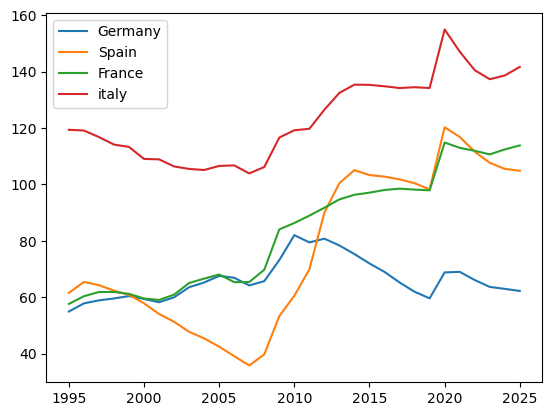

In [51]:
x = df_debt["Year"]

countries = ["Germany", "Spain", "France", "italy"]

for country in countries: 
    plt.plot(x, df_debt[country], label= country)
    
plt.legend();

In [52]:
df_debt_long = pd.melt(
    df_debt,
    id_vars = 'Year',
    var_name = 'Country',
    value_name = 'Debt ratio'
)

In [55]:
df_debt_long.head()

,Year,Country,Debt ratio
0,1995,Germany,54.9024
1,1996,Germany,57.7939
2,1997,Germany,58.8666
3,1998,Germany,59.5347
4,1999,Germany,60.3874


In [56]:
df_debt_long


,Year,Country,Debt ratio
0,1995,Germany,54.9024
1,1996,Germany,57.7939
2,1997,Germany,58.8666
3,1998,Germany,59.5347
4,1999,Germany,60.3874
...,...,...,...
119,2021,italy,147.1270
120,2022,italy,140.5217
121,2023,italy,137.3104
122,2024,italy,138.6244


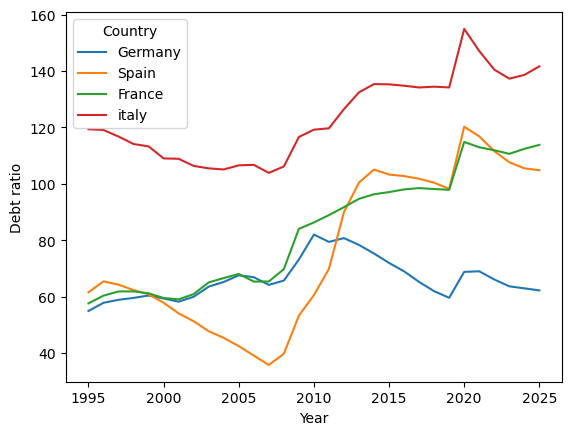

In [57]:
sns.lineplot(x = 'Year', 
             y = 'Debt ratio', 
             hue = 'Country', 
             data = df_debt_long);

In [58]:
df_debt_wide = pd.pivot(
    df_debt_long,
    index = 'Year', 
    columns = 'Country', 
    values = 'Debt ratio'
).reset_index()

In [59]:
df_debt_wide

Country,Year,France,Germany,Spain,italy
0,1995,57.5929,54.9024,61.5424,119.3622
1,1996,60.3374,57.7939,65.4076,119.1093
2,1997,61.8342,58.8666,64.2495,116.7821
3,1998,61.8435,59.5347,62.3060,114.1269
4,1999,61.1666,60.3874,60.8039,113.2895
5,2000,59.5167,59.3398,57.8153,109.0258
6,2001,59.0088,58.1930,54.0495,108.8863
7,2002,60.8896,59.9458,51.2499,106.3605
8,2003,65.0290,63.5383,47.7117,105.4946
9,2004,66.5689,65.2009,45.3655,105.1009
